In [1]:
# import logging
# class FilterModule(logging.Filter):
#     def __init__(self, modulename=""):
#         self.modulename = modulename
#     def filter(self, rec):
#         return not rec.name.startswith(self.modulename)

# logging.basicConfig(format='[%(asctime)s][%(levelname)s][%(name)s] %(message)s', level=logging.DEBUG)
# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# for handler in logger.handlers:
#     handler.addFilter(FilterModule("numba"))
#     handler.addFilter(FilterModule("matplotlib"))    

In [1]:
import ebisim as eb
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
# os.environ["NUMBA_DISABLE_INTEL_SVML"] = "1"
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 100
# eb.simulation._advanced.compile_adv_model()

print(os.environ.get("NUMBA_DISABLE_INTEL_SVML", "Not set"))

Not set


4000652.037804129
5000.815047255161
16.716800789249064
5.456586894847863


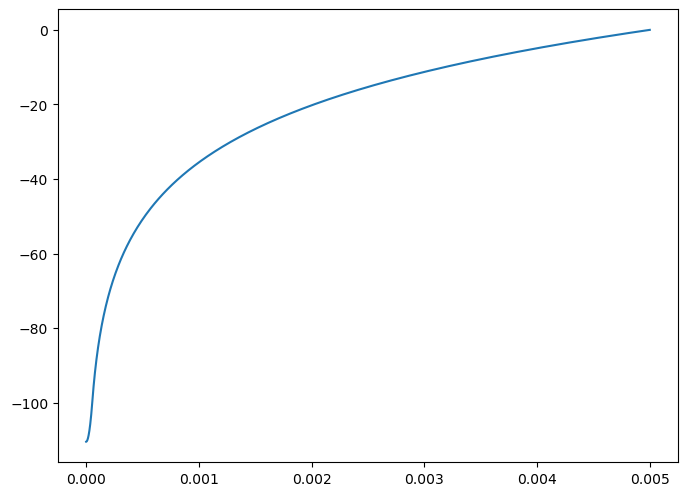

In [12]:
Ar = eb.Target.get_gas("Ar", 1.657e-10, 5e-3)
Xe = eb.Target.get_gas("Xe", 5/4*1.657e-13, 5e-3)

dev = eb.Device.get(current=.05, e_kin=5000, r_e=55e-6, length=5e-3, v_ax=-10, b_ax=2.5, r_dt=0.005, n_grid=300, r_dt_bar=1.5e-3) #n_gird = 600!!!
# dev = eb.Device.get(current=.05, e_kin=5000, r_e=55e-6, length=5e-3, v_ax=-13, b_ax=2.5, r_dt=0.005, n_grid=500, r_dt_bar=1.5e-3) #n_gird = 600!!!

# dev = eb.Device.get(current=1, e_kin=9700, r_e=1e-4, length=0.8, v_ax=240, b_ax=2, r_dt=0.005, n_grid=600,)
print(Ar.n[0] / 3.1415/0.005**2/1e6)
print(Xe.n[0] / 3.1415/0.005**2/1e6)
plt.figure()
plt.plot(dev.rad_grid, dev.rad_phi_uncomp)
print(dev.v_ax+dev.v_ax_sc-dev.rad_phi_uncomp[0])
print(dev.fwhm)
# print(repr(dev))

In [13]:
TMAX = 10
# T0 = 0.0001
ares, xres = eb.advanced_simulation(
    dev, [Ar, Xe],TMAX,
    options=eb.ModelOptions(RADIAL_DYNAMICS=True, IONISATION_HEATING=True),
    solver_kwargs={"method":"Radau","dense_output":False, "max_step":.1,},
    rates=True, n_threads=3
)

Initial temperature vector adjusted for Element: Argon (Ar, Z = 18, A = 40). This only affects charge states with densities at the minimum limit.
Initial temperature vector adjusted for Element: Xenon (Xe, Z = 54, A = 132). This only affects charge states with densities at the minimum limit.



Integration finished: 676379 calls                    
The solver successfully reached the end of the integration interval.
Calls: 676379 of which ~107615 normal (15.91%) and ~568764 for jacobian approximation (84.09%)
Rates finished: 6704 rates


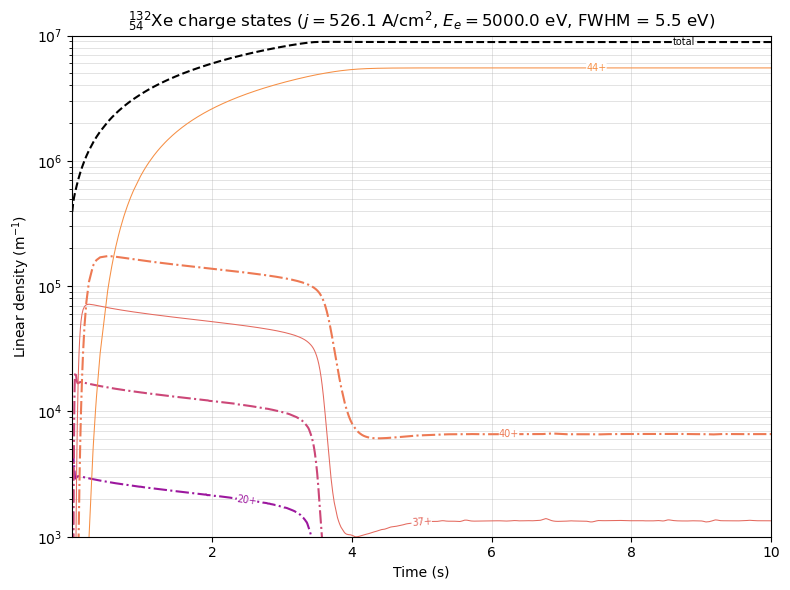

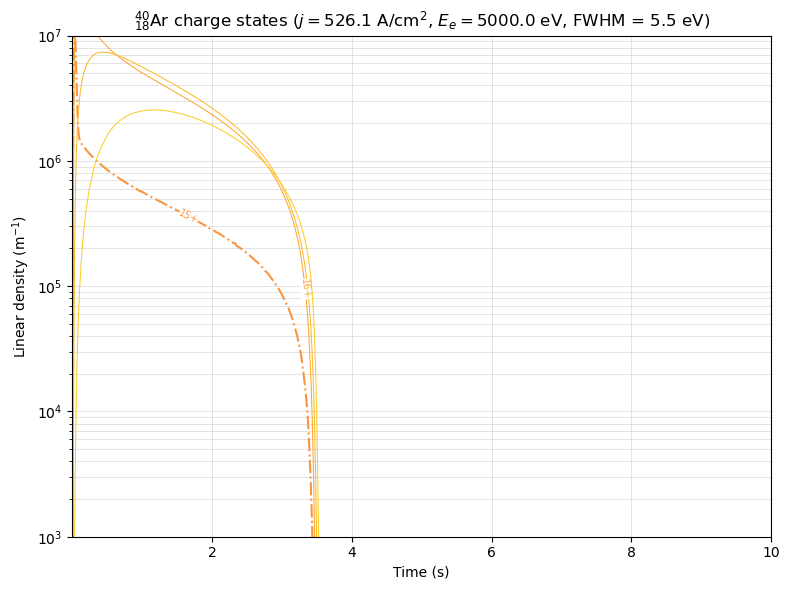

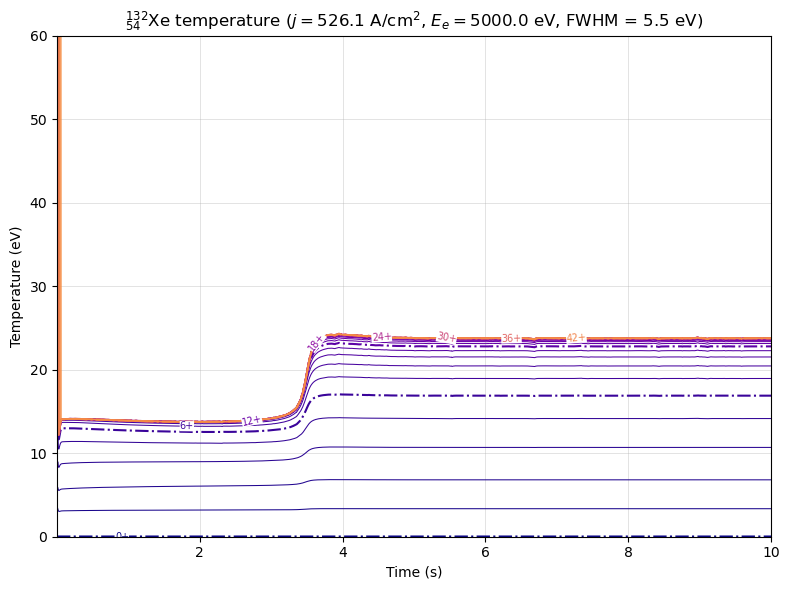

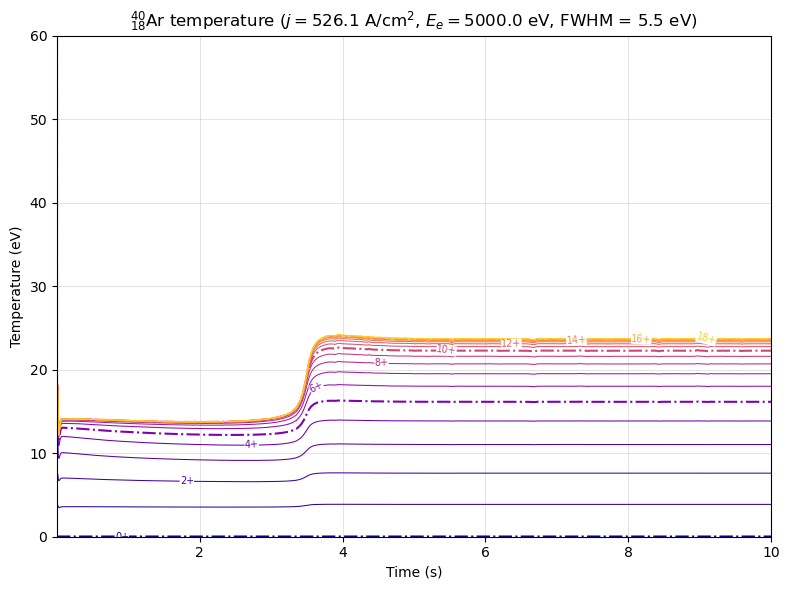

In [14]:
xres.plot(xscale="linear", yscale="log", ylim=(1000,1e7), cs=[10, 20, 30 ,37, 40, 44]);
ares.plot(xscale="linear", yscale="log", ylim=(1000,1e7), cs=range(15, 20));

# xres.plot(xscale="log", yscale="log", ylim=(1e-15,1e6))
xres.plot_temperature(xscale="linear", yscale="linear", ylim=(0,60), dens_threshold = 0);
ares.plot_temperature(xscale="linear", yscale="linear", ylim=(0,60), dens_threshold = 0);

# ares.plot(xscale="linear", yscale="log")#, ylim=(10,1e14))
# _=ares.plot_temperature(xscale="linear", yscale="linear", ylim=(0,60))

(<AxesSubplot:title={'center':'$\\mathsf{^{40}_{18}Ar}$ radial distribution at t = 5000.0 ms ($j = 526.1$ A/cm$^2$, $E_{e} = 5000.0$ eV, FWHM = 5.5 eV)'}, xlabel='Radius (m)', ylabel='Density (m$^{-3}$)'>,
 <AxesSubplot:label='aa876cfc-116e-477b-8916-6b461b8959dd', ylabel='Radial potential (V)'>)

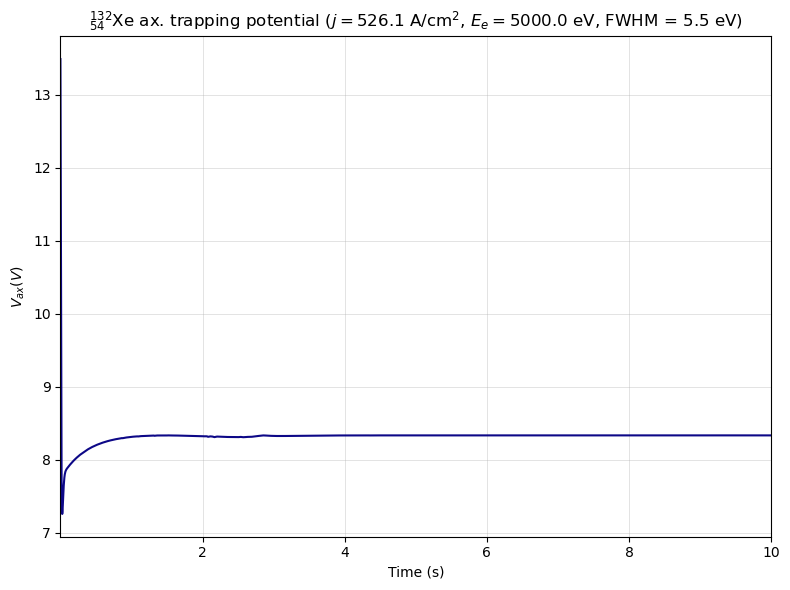

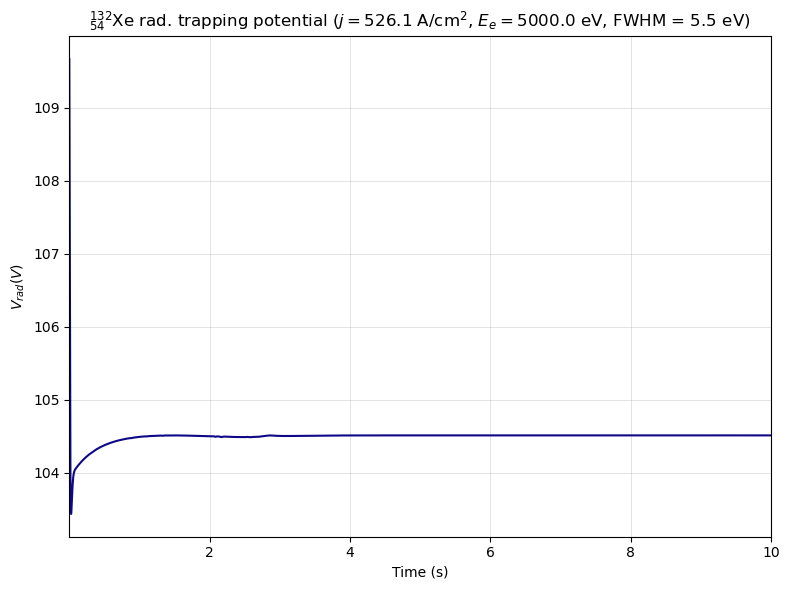

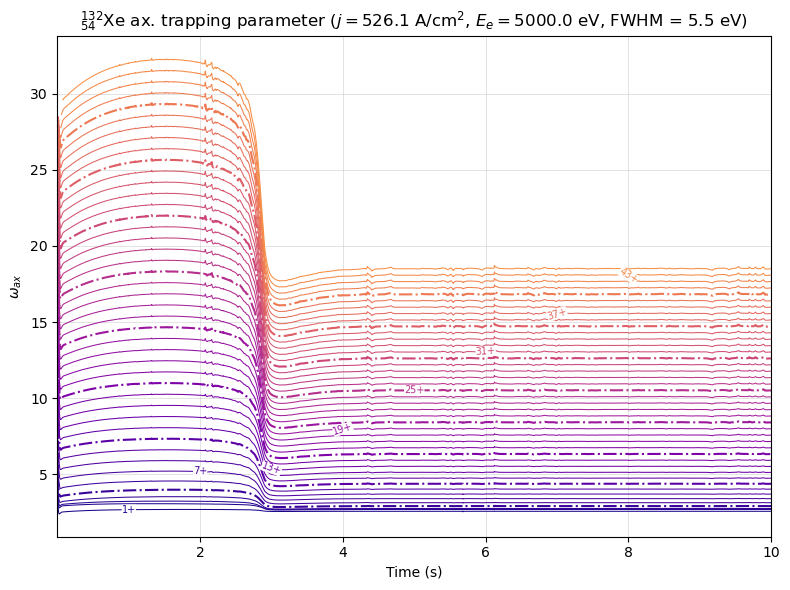

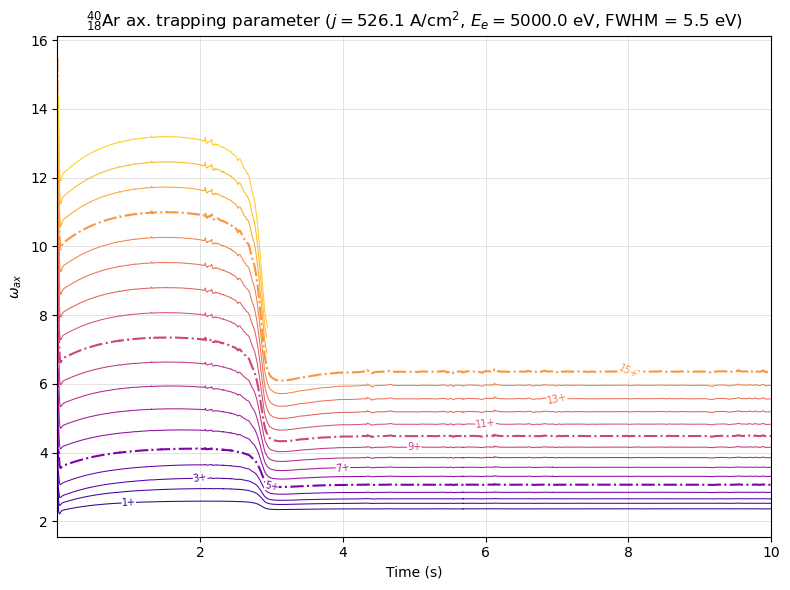

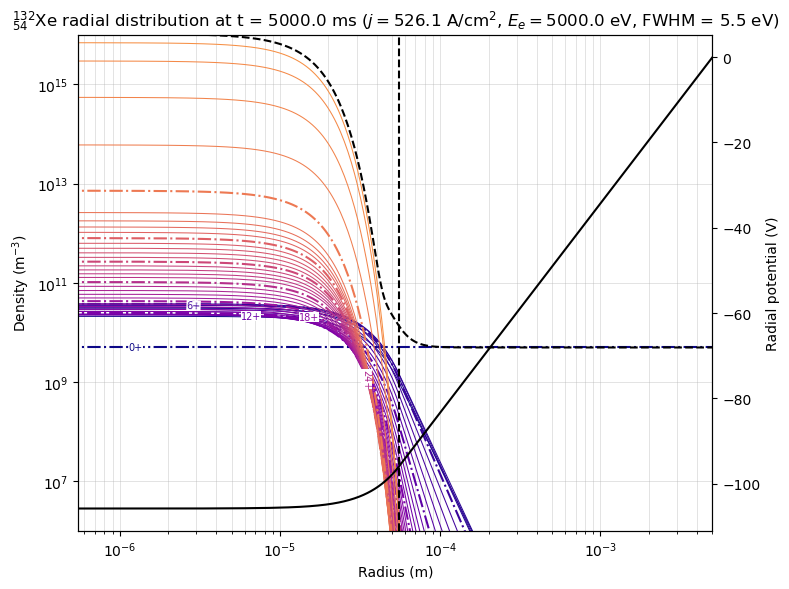

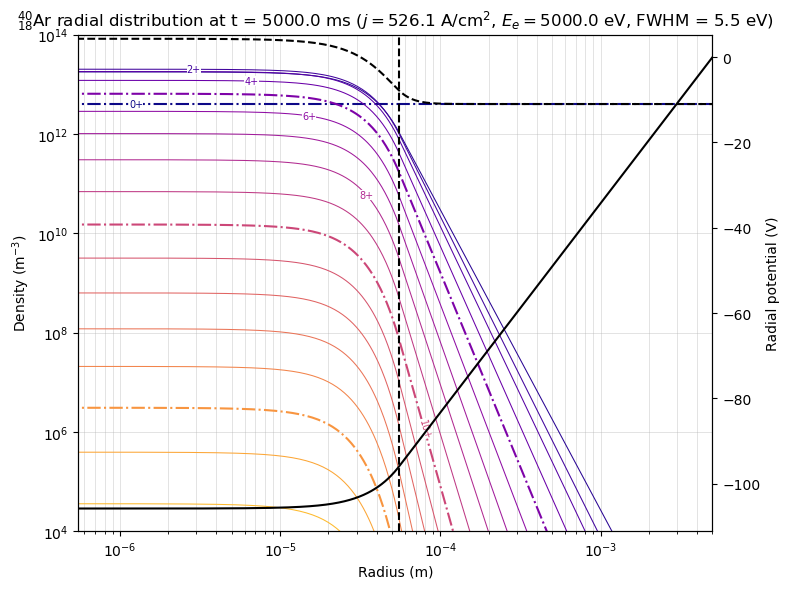

In [7]:
xres.plot_rate(eb.Rate.V_AX, xscale="linear")
xres.plot_rate(eb.Rate.V_RA, xscale="linear")
xres.plot_rate(eb.Rate.TRAPPING_PARAMETER_AXIAL, xscale="linear")
ares.plot_rate(eb.Rate.TRAPPING_PARAMETER_AXIAL, xscale="linear")

# xres.plot_rate(eb.Rate.COLLISION_RATE_SELF)
# xres.plot_rate(eb.Rate.COLLISION_RATE_TOTAL)
xres.plot_radial_distribution_at_time(5)
ares.plot_radial_distribution_at_time(5)

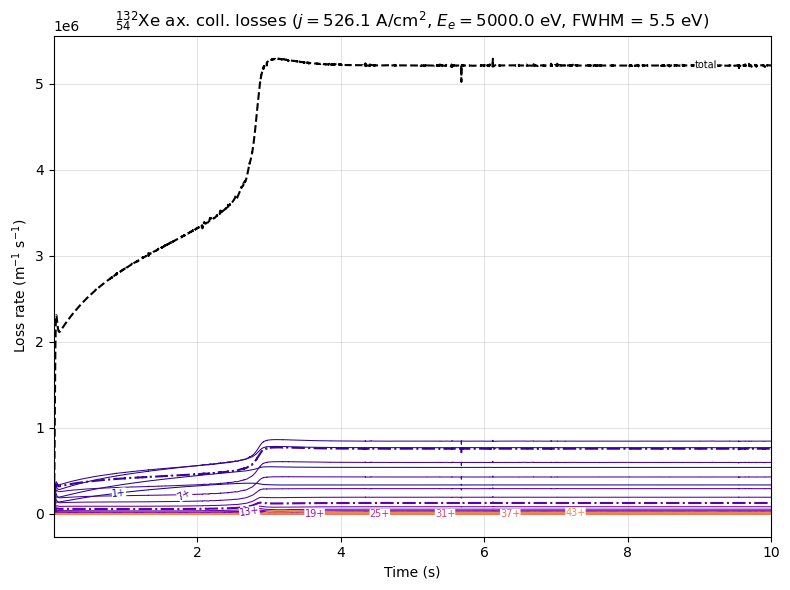

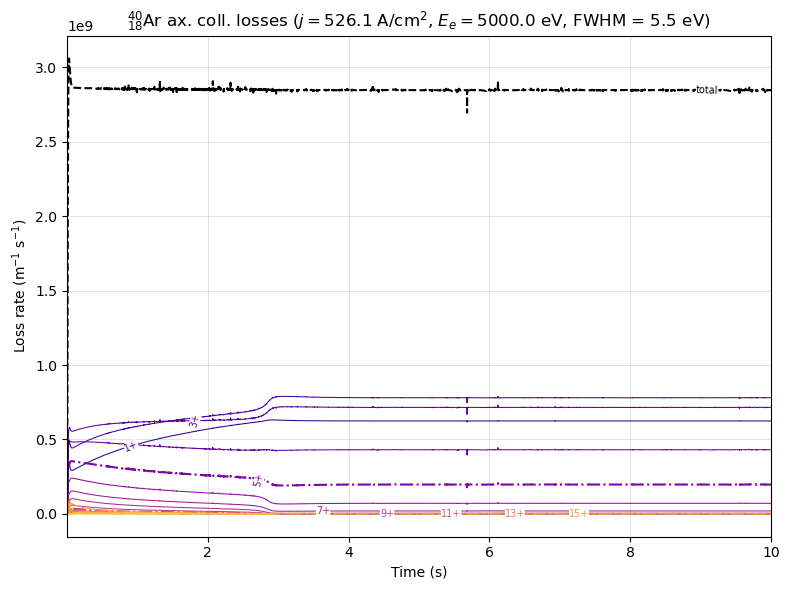

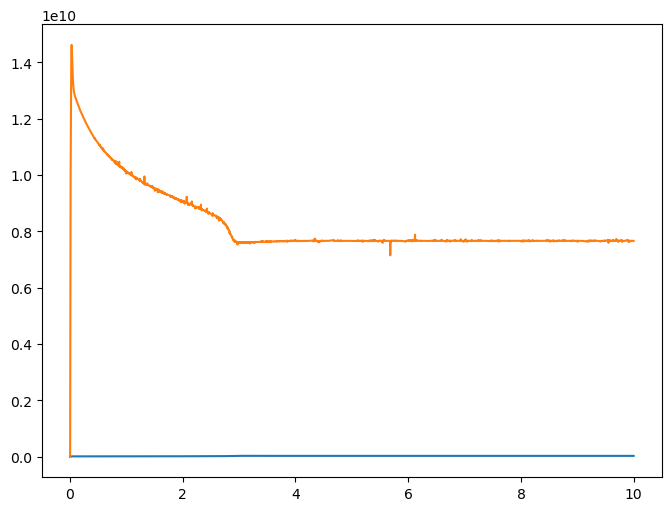

In [8]:
xres.plot_rate(eb.Rate.LOSSES_AXIAL_COLLISIONAL, xscale="linear", yscale="linear", plot_total=True);
# xres.plot_rate(eb.Rate.LOSSES_AXIAL_ROUNDTRIP, yscale="log", plot_total=True);
ares.plot_rate(eb.Rate.LOSSES_AXIAL_COLLISIONAL, xscale="linear", yscale="linear", plot_total=True);
# ares.plot_rate(eb.Rate.LOSSES_AXIAL_ROUNDTRIP, yscale="log", plot_total=True);
plt.figure()
plt.plot(xres.t, (xres.rates[eb.Rate.LOSSES_AXIAL_COLLISIONAL].T*np.arange(55)).sum(axis=-1))
plt.plot(ares.t, (ares.rates[eb.Rate.LOSSES_AXIAL_COLLISIONAL].T*np.arange(19)).sum(axis=-1))

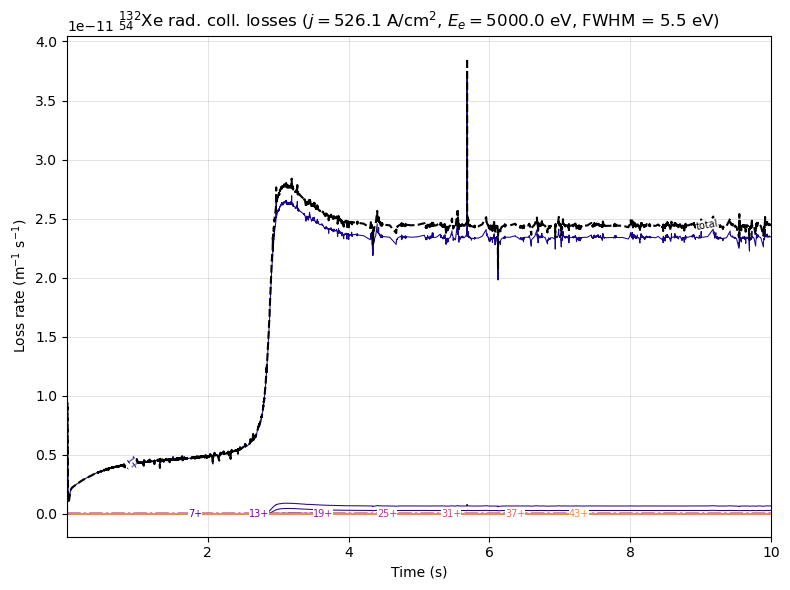

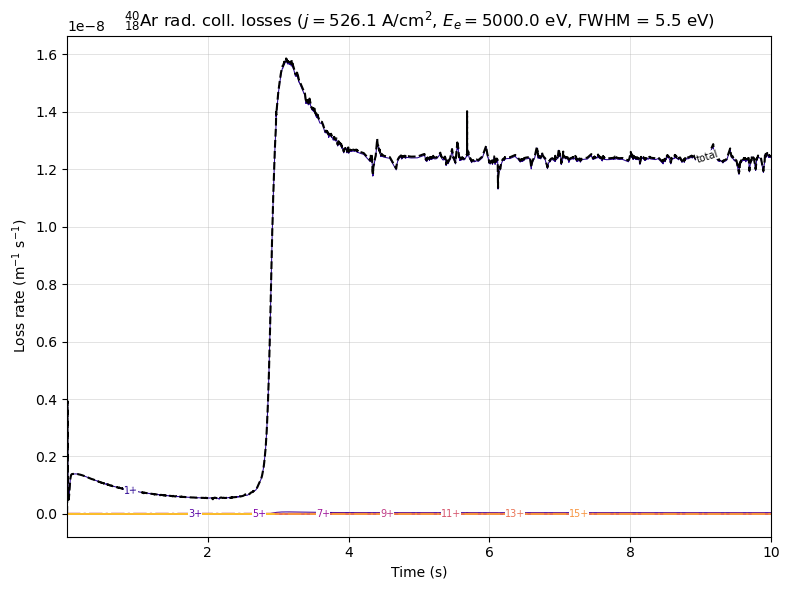

In [9]:
xres.plot_rate(eb.Rate.LOSSES_RADIAL_COLLISIONAL, xscale="linear", yscale="linear", plot_total=True);
# xres.plot_rate(eb.Rate.LOSSES_RADIAL_ROUNDTRIP, yscale="log", plot_total=True);
ares.plot_rate(eb.Rate.LOSSES_RADIAL_COLLISIONAL, xscale="linear", yscale="linear", plot_total=True);
# ares.plot_rate(eb.Rate.LOSSES_RADIAL_ROUNDTRIP, yscale="log", plot_total=True);

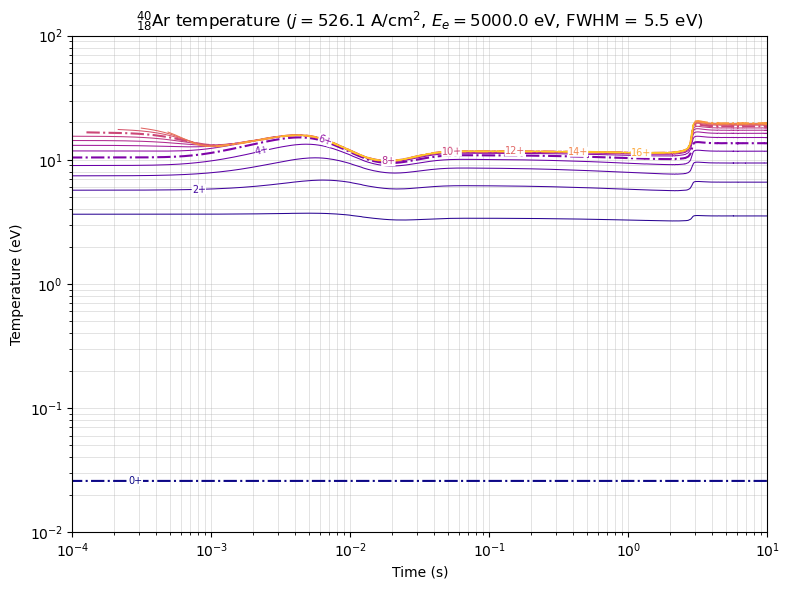

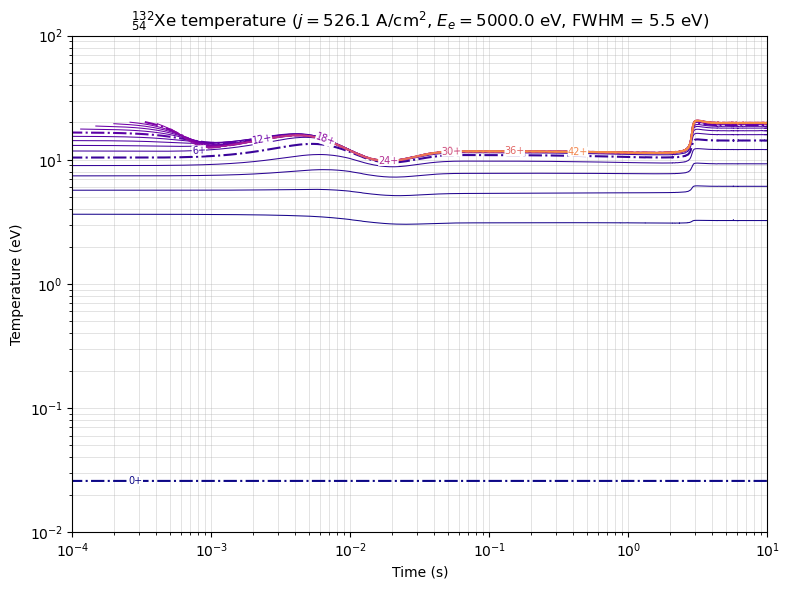

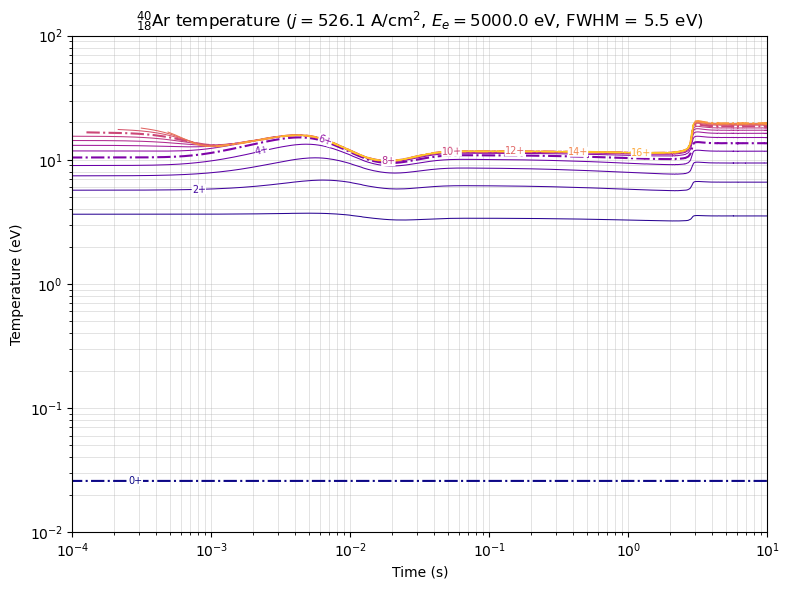

In [10]:
xres.plot_temperature(xscale="log", yscale="log")#, dens_threshold=0);
ares.plot_temperature(xscale="log", yscale="log")#, dens_threshold=0);

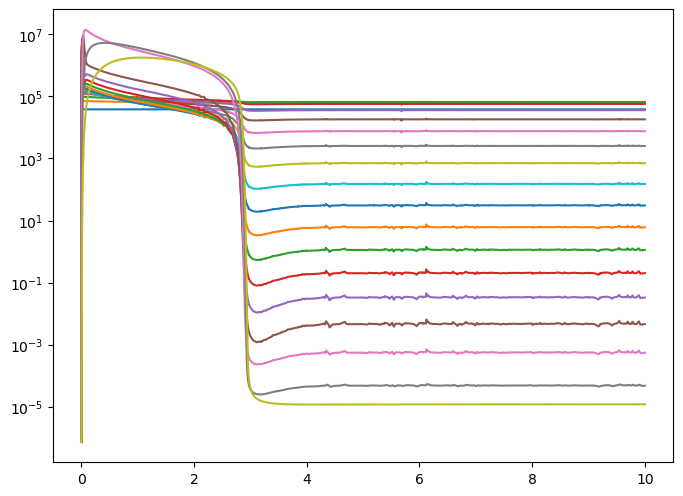

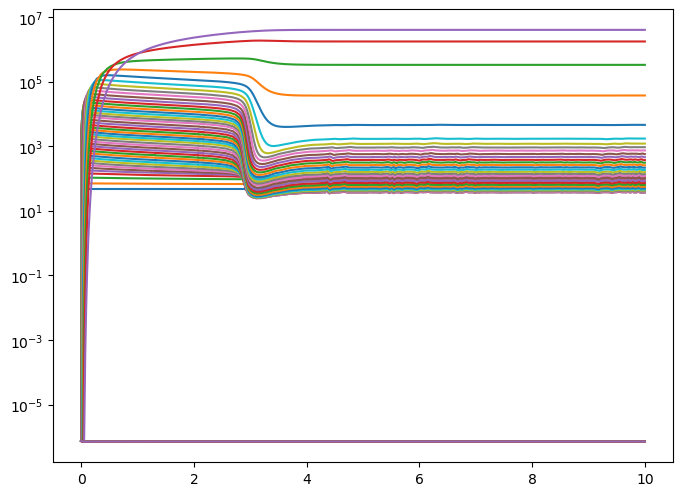

In [11]:
plt.semilogy(ares.t, (ares.N*ares.rates[eb.Rate.F_EI]).T)
plt.figure()
plt.semilogy(xres.t, (xres.N*xres.rates[eb.Rate.F_EI]).T);